In [1]:
import numpy as np
import pandas as pd
import scipy as sc
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
train_data = pd.read_csv('DA_titanic_train.csv')
test_data = pd.read_csv('DA_titanic_test.csv')
train = pd.DataFrame(train_data)
test = pd.DataFrame(test_data)

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
4,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
1,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
2,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
4,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,624.000000,624.000000,624.000000,494.000000,624.000000,624.000000,624.000000
mean,459.128205,0.383013,2.328526,29.658745,0.519231,0.354167,30.523470
std,257.314092,0.486511,0.822684,14.770773,1.071871,0.775559,48.186064
min,1.000000,0.000000,1.000000,0.670000,0.000000,0.000000,0.000000
25%,241.750000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,460.500000,0.000000,3.000000,28.000000,0.000000,0.000000,13.931250
75%,683.250000,1.000000,3.000000,38.000000,1.000000,0.000000,30.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,267.000000,267.000000,220.000000,267.000000,267.000000,267.000000
mean,415.318352,2.262172,29.789773,0.531835,0.445693,36.132224
std,255.301178,0.866346,13.995008,1.173773,0.871354,52.935439
min,4.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,174.500000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,412.000000,3.000000,29.000000,0.000000,0.000000,16.100000
75%,629.500000,3.000000,39.000000,1.000000,1.000000,36.125000
max,890.000000,3.000000,70.000000,8.000000,5.000000,512.329200


# Data preprocessing

In [7]:
#Drop unnecessary attributes
train = train.drop(['PassengerId','Name', 'Ticket','Cabin'], axis=1)
test = test.drop(['PassengerId','Name', 'Ticket','Cabin'], axis=1)

In [8]:
train['Sex'] = train['Sex'].apply({'male':0, 'female':1}.get)
test['Sex'] = test['Sex'].apply({'male':0, 'female':1}.get)
train['Embarked'] = train['Embarked'].apply({'S': 0, 'C': 1, 'Q': 2}.get)
test['Embarked'] = test['Embarked'].apply({'S': 0, 'C': 1, 'Q': 2}.get)

## Missing data

In [9]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         130
SibSp         0
Parch         0
Fare          0
Embarked      1
dtype: int64

In [10]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         130
SibSp         0
Parch         0
Fare          0
Embarked      1
dtype: int64

In [11]:
train = train.dropna(subset=['Embarked'])
test = test.dropna(subset=['Embarked'])

<AxesSubplot:>

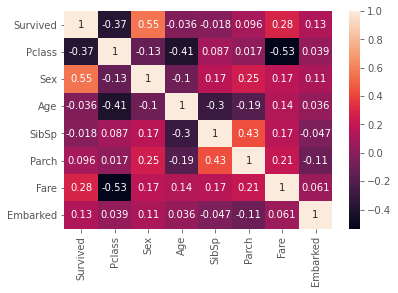

In [12]:
sns.heatmap(train.corr(), annot=True)

In [13]:
train.Age.fillna(train.groupby(['Sex','Pclass']).transform('median').Age, inplace=True)
test.Age.fillna(test.groupby(['Sex','Pclass']).transform('median').Age, inplace=True)

In [14]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [15]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Correlation of the features

<AxesSubplot:>

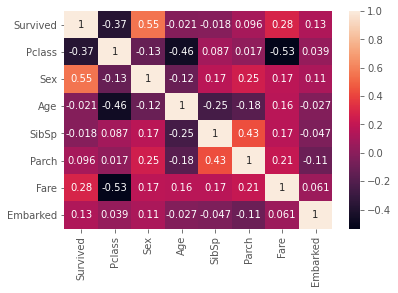

In [16]:
sns.heatmap(train.corr(), annot=True)

In [17]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.673759
1,2,0.459259
2,3,0.233429


In [18]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
1,1,0.735683
0,0,0.179293


In [19]:
train['Female_Pclass'] = train['Sex']*train['Pclass']
test['Female_Pclass'] = test['Sex']*test['Pclass']

In [21]:
train[["Female_Pclass", "Survived"]].groupby(['Female_Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Female_Pclass,Survived
1,1,0.968750
2,2,0.910714
3,3,0.504673
0,0,0.179293


In [22]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Female_Pclass
0,0,3,0,22.0,1,0,7.2500,0.0,0
1,1,1,1,38.0,1,0,71.2833,1.0,1
2,1,3,1,26.0,0,0,7.9250,0.0,3
3,0,3,0,35.0,0,0,8.0500,0.0,0
4,1,2,1,14.0,1,0,30.0708,1.0,2
...,...,...,...,...,...,...,...,...,...
619,0,2,0,28.0,0,0,10.5000,0.0,0
620,0,3,0,25.0,0,0,7.0500,0.0,0
621,1,1,1,19.0,0,0,30.0000,0.0,1
622,0,3,1,21.0,1,2,23.4500,0.0,3


## Numeric data to categorical

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

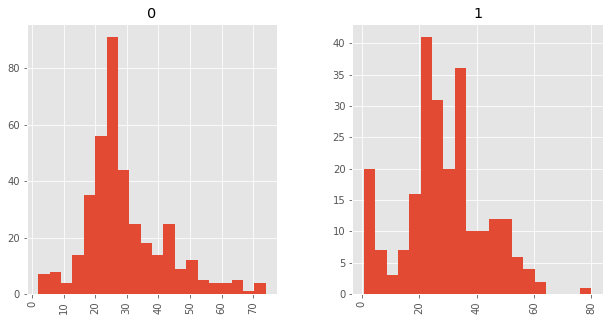

In [23]:
train['Age'].hist(by=train['Survived'], bins=20, figsize=(10,5))

In [24]:
bins = [0, 14, 30, 40, 66,np.inf]
names = [1,2,3,4,5]
train['AgeCateg'] = pd.cut(train['Age'], bins, labels=names)
test['AgeCateg'] = pd.cut(test['Age'], bins, labels=names)

In [25]:
train['AgeCateg'].value_counts()

2    340
4    114
3    108
1     55
5      6
Name: AgeCateg, dtype: int64

In [26]:
train[["AgeCateg", "Survived"]].groupby(['AgeCateg'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,AgeCateg,Survived
0,1,0.600000
2,3,0.490741
3,4,0.403509
1,2,0.308824
4,5,0.166667


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

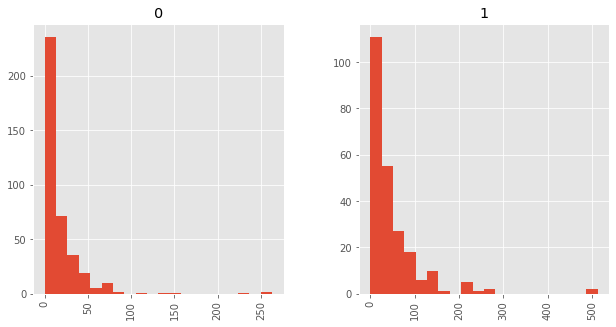

In [27]:
train['Fare'].hist(by=train['Survived'], bins=20, figsize=(10,5))

In [28]:
train['FareBand'] = pd.qcut(train['Fare'], 4)

In [29]:
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.896]",0.187879
1,"(7.896, 13.862]",0.292517
2,"(13.862, 30.0]",0.452229
3,"(30.0, 512.329]",0.603896


In [30]:
bins = [0, 7.9, 13.9, 30, np.inf]
names = [1,2,3,4]
train['FareCateg'] = pd.cut(train['Fare'], bins, labels=names)
test['FareCateg'] = pd.cut(test['Fare'], bins, labels=names)
train = train.drop('FareBand', axis=1)

In [31]:
train = train.drop(['Fare', 'Age'], axis=1)
test = test.drop(['Fare', 'Age'], axis=1)

In [34]:
# Factorize data
train['AgeCateg'] = pd.factorize(train['AgeCateg'])[0] + 1
train['FareCateg'] = pd.factorize(train['FareCateg'])[0] + 1

test['AgeCateg'] = pd.factorize(test['AgeCateg'])[0] + 1
test['FareCateg'] = pd.factorize(test['FareCateg'])[0] + 1

<AxesSubplot:>

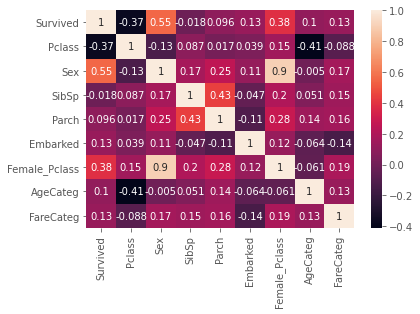

In [35]:
sns.heatmap(train.corr(), annot=True)

# Model: Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
X_train = train.drop("Survived", axis=1)
y_train = train["Survived"]
X_test = test

In [39]:
X_train.shape, y_train.shape, X_test.shape

((623, 8), (623,), (266, 8))

In [41]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

80.9

In [45]:
logreg.predict_proba(X_train)

array([[0.93849276, 0.06150724],
       [0.05810692, 0.94189308],
       [0.45496804, 0.54503196],
       ...,
       [0.05329544, 0.94670456],
       [0.44160914, 0.55839086],
       [0.84381384, 0.15618616]])

In [47]:
logreg.score(X_train, y_train)

0.8089887640449438

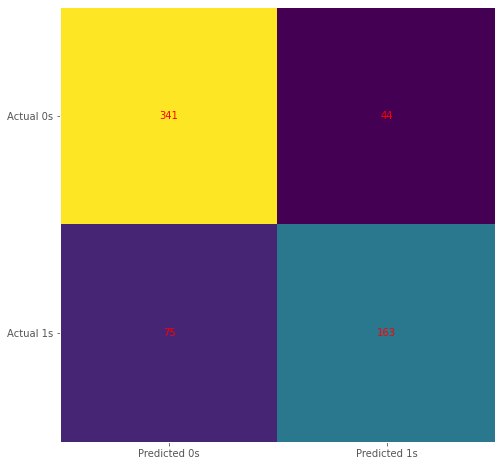

In [51]:
cm = confusion_matrix(y_train, logreg.predict(X_train))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [54]:
print(classification_report(y_train, logreg.predict(X_train)))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       385
           1       0.79      0.68      0.73       238

    accuracy                           0.81       623
   macro avg       0.80      0.79      0.79       623
weighted avg       0.81      0.81      0.81       623



## Further Development Ideas

- create more categorical features by combining the originals 
        * Pclass and Age
        * SibSp and Parch
- find patterns in the missing data of Age, use other technique to predict the missing values